# EECS 3401 Final Project

# Author: Jamie Fletcher, Arshvir Singh, Kwonmin Bok

**Original Dataset Source: Amitansh Joshi, Amit Parolkar, &amp; Vedant Das. (2023). <i>Spotify_1Million_Tracks</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/5987852**

**Modified Dataset: Spotify song data. https://raw.githubusercontent.com/MrP29/EECS3401_Project/main/data/spotify_songs.csv**

# Spotify Song Dataset Description

**Attributes for spotify_songs.csv dataset:**  
The below attributes are copied **AS IS** from the original dataset.

1. artist_name - Name of artist

2. track_name - Name of track

3. track_id - Unique id code of track

4. popularity - Track popularity (0 to 100)

5. year - Year released (2023)

6. genre - Genre of the song

7. danceability - Track suitability for dancing (0.0 to 1.0)

8. energy - The perceptual measure of intensity and activity (0.0 to 1.0)

9. key - The key, the track is in (-1 to -11)

10. loudness - Overall loudness of track in decibels (-60 to 0 dB)

11. mode - Modality of the track (Major '1 / Minor '0')

12. speechiness - Presence of spoken words in the track

13. acousticness - Confidence measure from 0 to 1 of whether the track is acoustic

14. instrumentalness - Whether tracks contain vocals (0.0 to 1.0)

15. liveness - Presence of audience in the recording (0.0 to 1.0)

16. valence - Musical positiveness (0.0 to 1.0)

17. tempo - Tempo of the track in beats per minute (BPM)

18. duration_ms - Duration of track in milliseconds

19. time_signature - Estimated time signature (3 to 7)

# 1 - Look at the big picture and frame the problem.

### Frame the problem
1. Supervised learning
2. A regression task
3. Batch learning

### Look at the big picture
Predictions will be used to help music producers to know which type of songs are trendy and popular these days.

In [1]:
# Import libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 - Load the dataset
Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series. 
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/MrP29/EECS3401_Project/main/data/spotify_songs.csv"
songs = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
songs_backup = songs

In [3]:
# Drop index columns. We don't want to visualize these or train on them by mistake
songs = songs.drop(["Index", "Unnamed: 0"], axis=1)

## 2.1 - Take a quick look at the data structure

In [4]:
songs

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Bruno Mars,Locked out of Heaven,3w3y8KPTfNeOKPiqUTakBh,85,2012,dance,0.726,0.698,5,-4.165,1,0.0431,0.049000,0.000000,0.3090,0.8670,143.994,233478,4
1,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,82,2012,hip-hop,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.4970,123.061,234093,4
2,Bruno Mars,When I Was Your Man,0nJW01T7XtvILxQgC5J7Wh,87,2012,pop,0.612,0.280,0,-8.648,1,0.0434,0.932000,0.000000,0.0880,0.3870,72.795,213827,4
3,One Direction,What Makes You Beautiful,4cluDES4hQEUhmXj6TXkSo,82,2012,pop,0.726,0.787,4,-2.494,1,0.0737,0.009000,0.000000,0.0596,0.8880,124.990,199987,4
4,Avicii,Wake Me Up,0nrRP2bk19rLc0orkWPQk2,84,2013,dance,0.532,0.783,2,-5.697,1,0.0523,0.003800,0.001200,0.1610,0.6430,124.080,247427,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,Khors,Trees Are Remembers,7wjJrH0oUjdvvXxn5kYLT8,1,2005,black-metal,0.239,0.759,2,-8.500,1,0.0495,0.000002,0.957000,0.1770,0.1140,75.117,289985,4
3862,Yuichiro Fujimoto,Drawing Of Stars,0TMhSOjfkvKQaoPfukFJwZ,6,2005,ambient,0.391,0.109,4,-19.083,1,0.0827,0.403000,0.617000,0.0810,0.0337,53.069,390640,5
3863,Kerry Butler,It's a Small World / God Help the Outcasts,4dqvtMyXaYkFrtgZjTXJqP,2,2008,show-tunes,0.184,0.110,6,-14.965,1,0.0384,0.912000,0.000196,0.1270,0.2010,78.524,266733,3
3864,Eartheater,Switch,2L3D9Vp9c4VGFdwSPwdFD4,16,2018,club,0.282,0.313,11,-16.656,0,0.0400,0.368000,0.189000,0.1120,0.1580,118.615,277117,4


In [5]:
songs.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Bruno Mars,Locked out of Heaven,3w3y8KPTfNeOKPiqUTakBh,85,2012,dance,0.726,0.698,5,-4.165,1,0.0431,0.0490,0.000000,0.3090,0.867,143.994,233478,4
1,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,82,2012,hip-hop,0.913,0.603,8,-4.892,1,0.2260,0.0272,0.000503,0.1670,0.497,123.061,234093,4
2,Bruno Mars,When I Was Your Man,0nJW01T7XtvILxQgC5J7Wh,87,2012,pop,0.612,0.280,0,-8.648,1,0.0434,0.9320,0.000000,0.0880,0.387,72.795,213827,4
3,One Direction,What Makes You Beautiful,4cluDES4hQEUhmXj6TXkSo,82,2012,pop,0.726,0.787,4,-2.494,1,0.0737,0.0090,0.000000,0.0596,0.888,124.990,199987,4
4,Avicii,Wake Me Up,0nrRP2bk19rLc0orkWPQk2,84,2013,dance,0.532,0.783,2,-5.697,1,0.0523,0.0038,0.001200,0.1610,0.643,124.080,247427,4


In [6]:
songs.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3.866000e+03,3866.000000
mean,46.346353,2015.360062,0.584053,0.643762,5.231764,-7.855557,0.613295,0.091985,0.280060,0.145136,0.203760,0.465647,121.168736,2.253081e+05,3.909984
std,22.647037,6.460764,0.176010,0.243601,3.580396,5.322402,0.487058,0.102253,0.312544,0.299335,0.178661,0.248572,29.497609,1.112227e+05,0.410935
min,1.000000,2000.000000,0.000000,0.000079,0.000000,-48.980000,0.000000,0.000000,0.000001,0.000000,0.019700,0.000000,0.000000,3.000000e+04,0.000000
25%,28.000000,2011.000000,0.477250,0.491250,2.000000,-8.989000,0.000000,0.036700,0.017325,0.000000,0.098300,0.267000,98.002750,1.775308e+05,4.000000
50%,46.000000,2017.000000,0.600000,0.688000,5.000000,-6.500500,1.000000,0.052300,0.144000,0.000026,0.128000,0.451500,120.985000,2.115035e+05,4.000000
75%,64.000000,2021.000000,0.715000,0.839000,8.000000,-4.781000,1.000000,0.097000,0.487000,0.034725,0.259000,0.662000,139.979750,2.511198e+05,4.000000
max,100.000000,2023.000000,0.964000,1.000000,11.000000,0.963000,1.000000,0.959000,0.996000,1.000000,0.996000,0.988000,216.429000,3.600014e+06,5.000000


In [7]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866 entries, 0 to 3865
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       3866 non-null   object 
 1   track_name        3866 non-null   object 
 2   track_id          3866 non-null   object 
 3   popularity        3866 non-null   int64  
 4   year              3866 non-null   int64  
 5   genre             3866 non-null   object 
 6   danceability      3866 non-null   float64
 7   energy            3866 non-null   float64
 8   key               3866 non-null   int64  
 9   loudness          3866 non-null   float64
 10  mode              3866 non-null   int64  
 11  speechiness       3866 non-null   float64
 12  acousticness      3866 non-null   float64
 13  instrumentalness  3866 non-null   float64
 14  liveness          3866 non-null   float64
 15  valence           3866 non-null   float64
 16  tempo             3866 non-null   float64


# 3 - Explore and visualize dataset

## 3.1 Plot general histogram

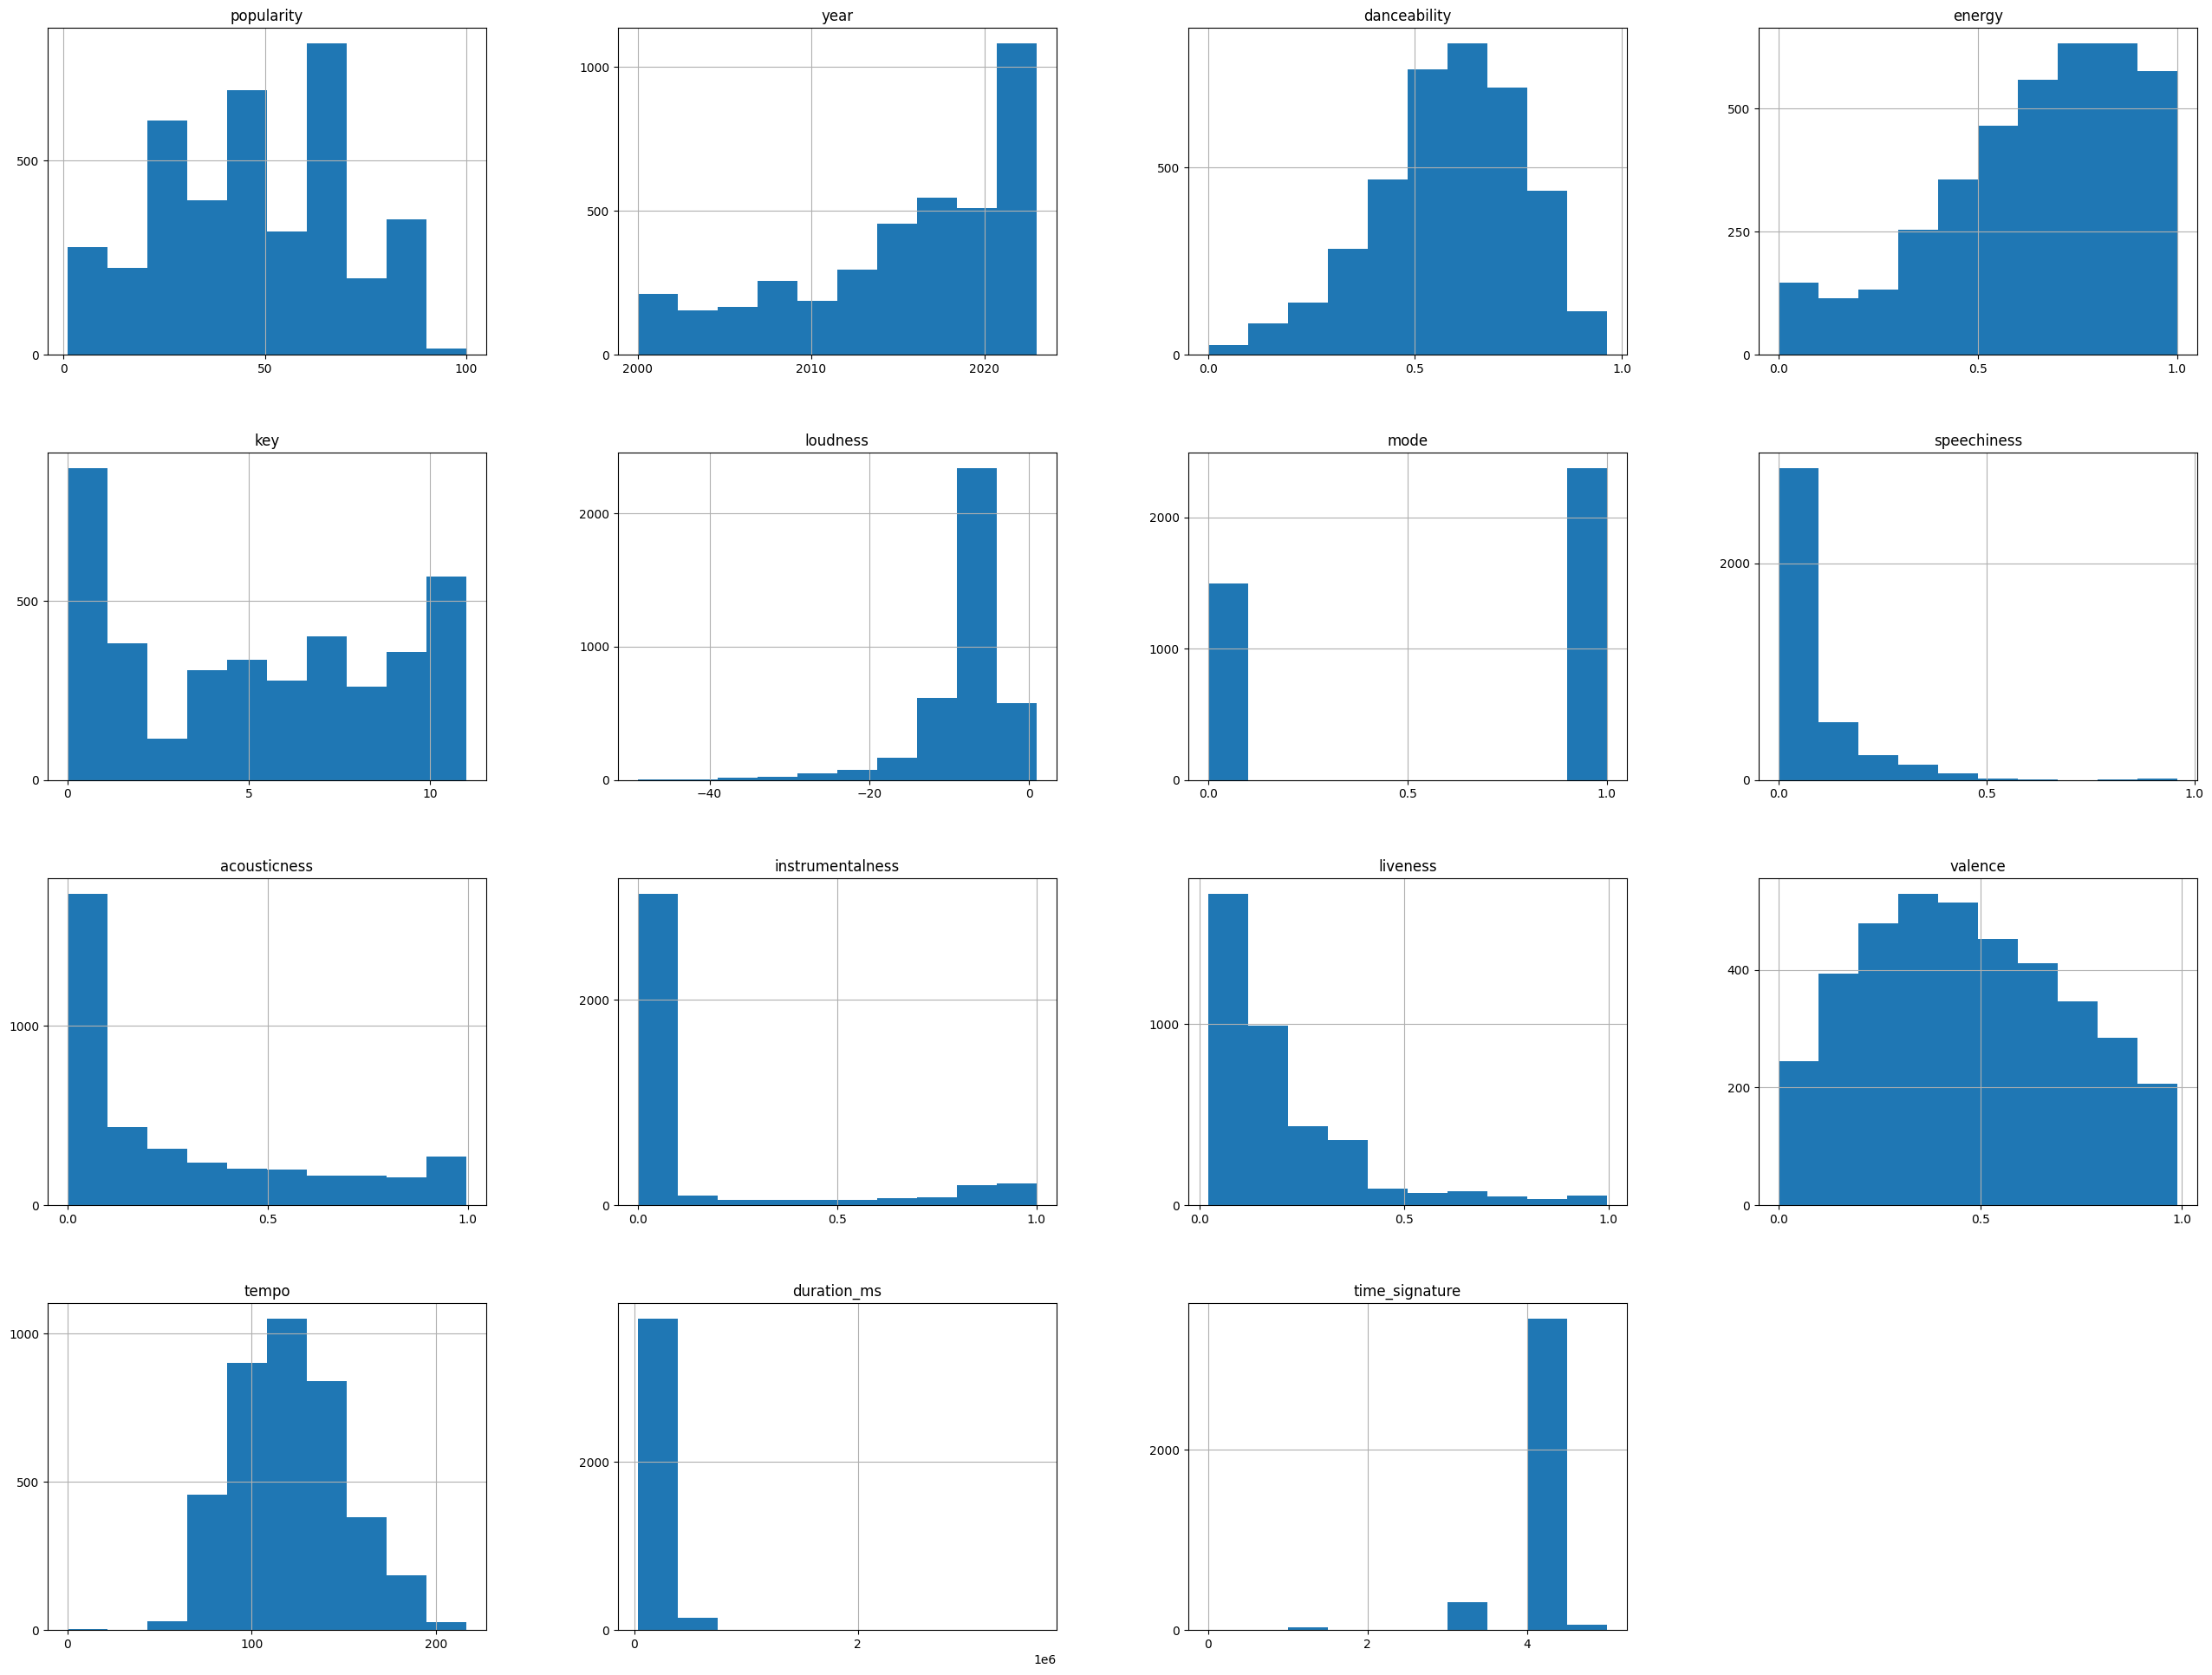

In [8]:
songs.hist(figsize=(32, 24))
plt.rcParams.update({'font.size': 40})
plt.show()

## 3.2 Correlation matrix

In [9]:
corr_matrix = songs.corr(numeric_only=True)

# Examine feature correlations with target
corr_matrix["popularity"].sort_values(ascending=False)

popularity          1.000000
year                0.367383
danceability        0.276396
loudness            0.190444
valence             0.089856
time_signature      0.034572
energy              0.015164
tempo               0.014541
key                 0.004291
speechiness        -0.003842
mode               -0.006666
acousticness       -0.074425
liveness           -0.085254
duration_ms        -0.176461
instrumentalness   -0.308309
Name: popularity, dtype: float64

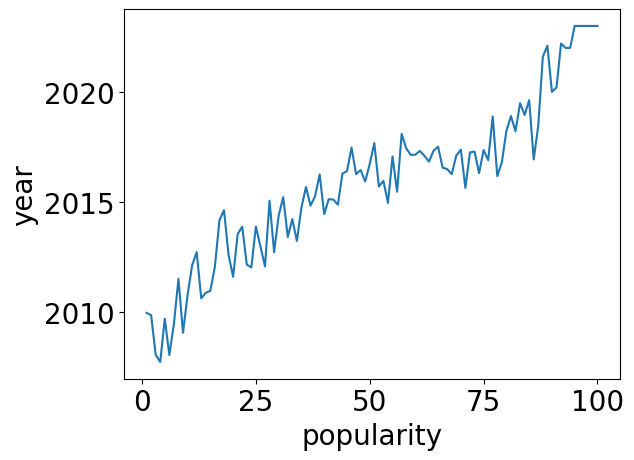

In [10]:
plt.rcParams.update({'font.size': 20})
pop_vs_loud = sns.lineplot(x="popularity", y="year", data=songs, errorbar=None)

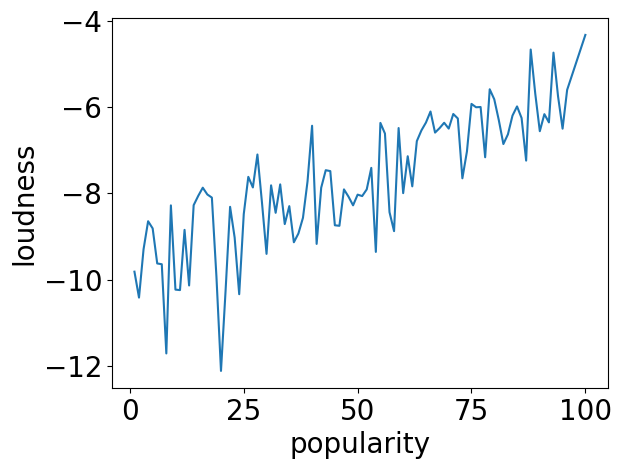

In [11]:
pop_vs_acousticness = sns.lineplot(x="popularity", y="loudness", data=songs, errorbar=None)

## 3.3 Look at structure of target (popularity)

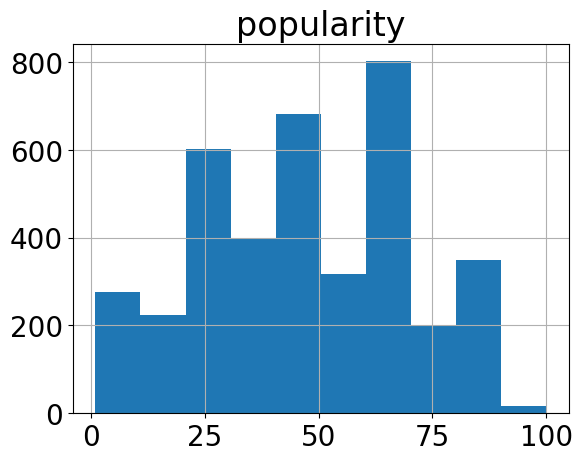

In [12]:
songs.hist(column="popularity", bins=10)
plt.show()

## 3.4 Look at structure of artist_name and genre

In [13]:
count_by_artist = songs["artist_name"].value_counts()
print(count_by_artist)

artist_name
Taylor Swift    22
Drake           17
The Weeknd      15
BTS             12
$uicideboy$     12
                ..
Ojerime          1
Tep No           1
Nickel Creek     1
RuPaul           1
DJ Hazard        1
Name: count, Length: 2923, dtype: int64


<Axes: xlabel='artist_name'>

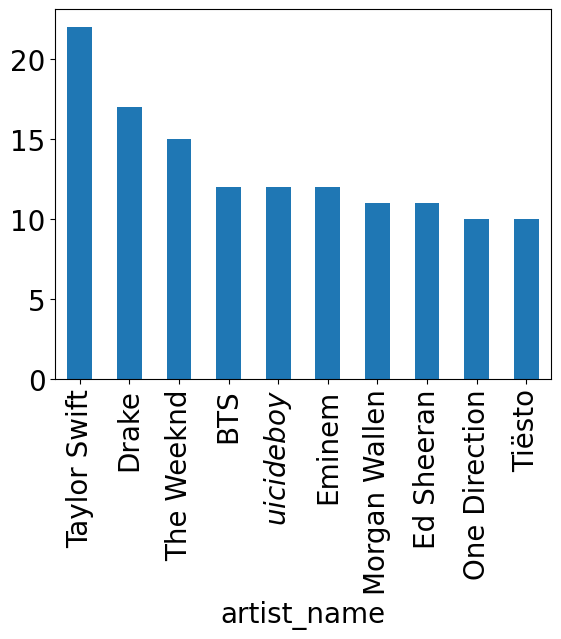

In [14]:
top10_artists = count_by_artist[:10]
top10_artists.plot(kind='bar')

In [15]:
count_by_genre = songs["genre"].value_counts()
print(count_by_genre)

genre
pop               311
hip-hop           307
dance             300
alt-rock          163
country           138
                 ... 
punk-rock           6
chicago-house       4
detroit-techno      2
romance             2
dubstep             1
Name: count, Length: 81, dtype: int64


<Axes: xlabel='genre'>

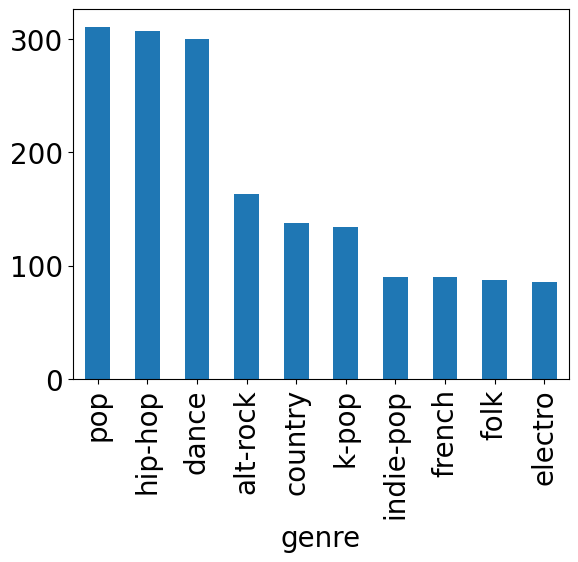

In [16]:
top10_genre = count_by_genre[:10]
top10_genre.plot(kind='bar')

# 4 - Preprocessing

## 4.1 Drop unique features

There are several columns in the dataset that are unique to each example/track (track_name, track_id). These need to be removed so that the models do not accidentally train on them (i.e., overfit).

In [17]:
songs = songs.drop(["track_name", "track_id"], axis=1)
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866 entries, 0 to 3865
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       3866 non-null   object 
 1   popularity        3866 non-null   int64  
 2   year              3866 non-null   int64  
 3   genre             3866 non-null   object 
 4   danceability      3866 non-null   float64
 5   energy            3866 non-null   float64
 6   key               3866 non-null   int64  
 7   loudness          3866 non-null   float64
 8   mode              3866 non-null   int64  
 9   speechiness       3866 non-null   float64
 10  acousticness      3866 non-null   float64
 11  instrumentalness  3866 non-null   float64
 12  liveness          3866 non-null   float64
 13  valence           3866 non-null   float64
 14  tempo             3866 non-null   float64
 15  duration_ms       3866 non-null   int64  
 16  time_signature    3866 non-null   int64  


## 4.2 Check for missing values (Nan or '?')

In [18]:
songs = songs.replace('?', np.nan)
songs.isna().sum()

artist_name         0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

## 4.3 Split features (X) and target (y)

In [19]:
# Split features and target
X = songs.drop(["popularity"], axis = 1)
y = songs["popularity"]

## 4.4 Preprocessing pipeline

Since our dataset does not have missing values, several preprocessing steps are not strictly necessary. However, we include them here for completeness. The major concern here is to complete the one-hot encoding for the categorical data (artist_name, genre).

In [20]:
# Import libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create two column lists: 1 for numerical features, 1 for categorical features 
num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()

# Create separate pipelines for numeric and categorical features
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False, handle_unknown='error'))

preprocessing = ColumnTransformer(
    [('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)], remainder='passthrough'
)

# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['year', 'danceability', 'energy', 'key',
                                  'loudness', 'mode', 'speechiness',
                                  'acousticness', 'instrumentalness',
                                  'liveness', 'valence', 'tempo', 'duration_ms',
                                  'time_signature']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['artist_name', 'genre'])])

In [21]:
from sklearn.preprocessing import PolynomialFeatures
# Train a pipeline and apply dataset into the pipeline
X_prep = preprocessing.fit_transform(X)

# Convert back to pd.DataFrame
feature_names = preprocessing.get_feature_names_out()
X_prep = pd.DataFrame(data=X_prep, columns=feature_names)

print(X_prep.shape)

(3866, 3018)


## 4.5 Split test and training datasets
Split the data into 80% Training set and 20% Testing set

In [22]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

# Check the shape of splitted data set
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3092, 3018) (3092,) (774, 3018) (774,)


# 5 - Model Selection

We train three regression models (Ridge Regression, SVM, Random Forest) and evaluated their performance

## 5.1 Ridge Regression

### 5.1.1 Cross validation with training dataset

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = Ridge()

k_folds = 10
cv_scores = cross_validate(
    estimator = lr_model,
    X = X_train, 
    y = y_train, 
    cv = k_folds, 
    scoring = ('neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'),
    return_train_score = False
)

lr_train_perf = {
    "rmse": -1 * np.mean(cv_scores['test_neg_root_mean_squared_error']),
    "mae" : -1 * np.mean(cv_scores['test_neg_mean_absolute_error']),
    "r2"  : np.mean(cv_scores['test_r2'])
}
lr_train_perf

{'rmse': 13.984751378320018,
 'mae': 11.31404051605477,
 'r2': 0.6121506453098957}

### 5.1.2 Model evaluation with test dataset

In [24]:
lr_model.fit(X_train,y_train)
lr_y_predict = lr_model.predict(X_test)

lr_test_perf = {
    "rmse": mean_squared_error(y_test, lr_y_predict, squared=False),
    "mae" : mean_absolute_error(y_test, lr_y_predict),
    "r2"  : r2_score(y_test, lr_y_predict)
}
lr_test_perf

{'rmse': 14.20155226244389,
 'mae': 11.218141516515956,
 'r2': 0.6223114326861938}

### 5.1.3 Model prediction graph

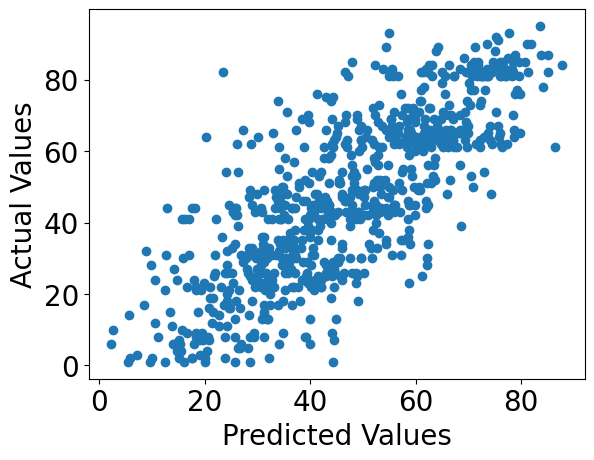

In [25]:
plt.scatter(lr_y_predict, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### 5.1.4 Model score with training data and testing data

In [26]:
print("Linear Regression Training score: {}".format(lr_model.score(X_train, y_train)))
print("Linear Regression Testing score: {}".format(lr_model.score(X_test, y_test)))

Linear Regression Training score: 0.8803165713157131
Linear Regression Testing score: 0.6223114326861938


## 5.2 Support Vector Regression (SVR)

### 5.2.1 Grid search to tune model hyper-parameters

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# grid search code adapted from luisguiserrano (from A2)
svm_params = {
    'kernel'  : ['rbf'],
    'C'       : [0.1, 1, 10, 100],
    'gamma'   : [0.01, 1, 10],
    'epsilon' : [0.01, 0.1, 1]
}

svr = SVR()
svr_gs = GridSearchCV(estimator=svr, param_grid=svm_params,
                      scoring='neg_root_mean_squared_error', cv=5)
svr_gs.fit(X_train,y_train)
svr_model = svr_gs.best_estimator_

svr_model.get_params()

{'C': 100,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 1,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### 5.2.2 Create a SVR model with best hyper-parameters

In [28]:
# Final model based on grid search
best_c = svr_model.C
best_gamma = svr_model.gamma
best_epsilon = svr_model.epsilon

svr_model = SVR(kernel='rbf', C=best_c, gamma=best_gamma, epsilon=best_epsilon)

### 5.2.3 Cross validation with training dataset

In [29]:
k_folds = 5
cv_scores = cross_validate(
    estimator = svr_model,
    X = X_train, 
    y = y_train, 
    cv = k_folds, 
    scoring = ('neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'),
    return_train_score = False
)

svr_train_perf = {
    "rmse": -1 * np.mean(cv_scores['test_neg_root_mean_squared_error']),
    "mae" : -1 * np.mean(cv_scores['test_neg_mean_absolute_error']),
    "r2"  : np.mean(cv_scores['test_r2'])
}
svr_train_perf

{'rmse': 14.578666184002168,
 'mae': 11.827666254214552,
 'r2': 0.5799297944376877}

### 5.2.4 Model evaluation with test dataset

In [30]:
svr_model.fit(X_train,y_train)
svr_y_predict = svr_model.predict(X_test)

svr_test_perf = {
    "rmse": mean_squared_error(y_test, svr_y_predict, squared=False),
    "mae" : mean_absolute_error(y_test, svr_y_predict),
    "r2"  : r2_score(y_test, svr_y_predict)
}
svr_test_perf

{'rmse': 14.645397327597266,
 'mae': 11.626528711590696,
 'r2': 0.5983345069944405}

### 5.2.5 Model prediction graphs

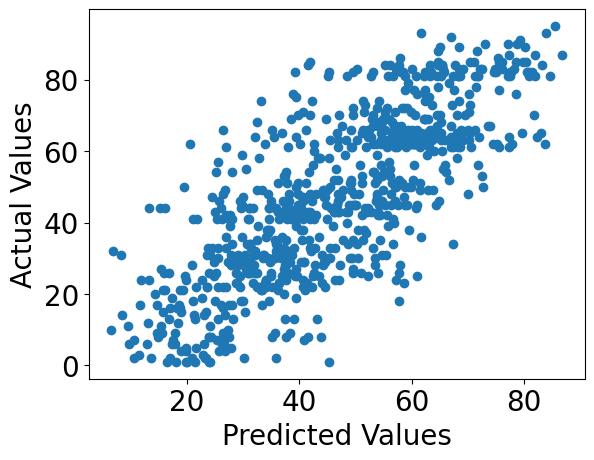

In [31]:
plt.scatter(svr_y_predict, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

<Axes: >

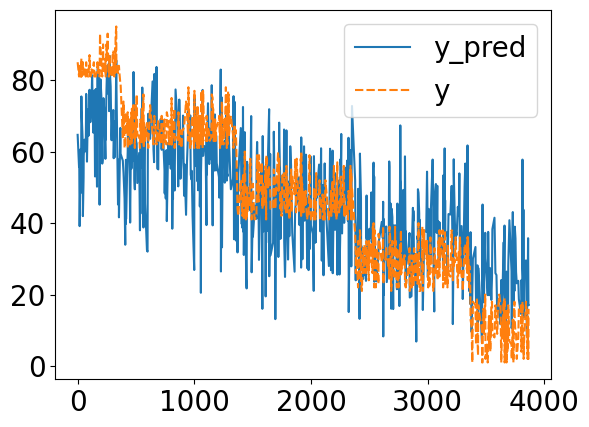

In [32]:
df = pd.DataFrame({
    'y_pred': svr_y_predict, 
    'y': y_test,
})
sns.lineplot(data=df)

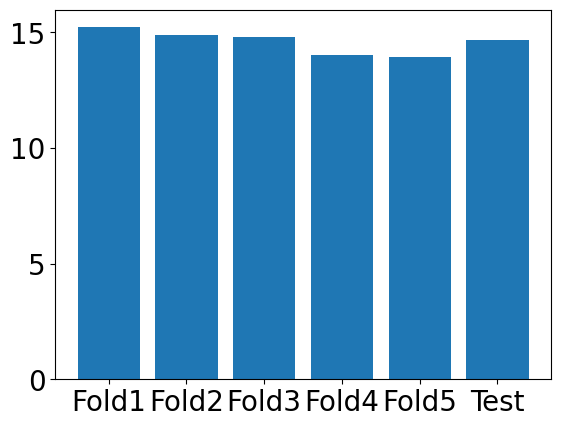

In [33]:
rmse_scores = [-1 * i for i in cv_scores['test_neg_root_mean_squared_error']]
rmse_scores.append(svr_test_perf['rmse'])

labels = ['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5', 'Test']

plt.xticks(range(len(labels)), labels)
# plt.ylabel('RMSE')
plt.bar(range(len(rmse_scores)), rmse_scores)
plt.show()


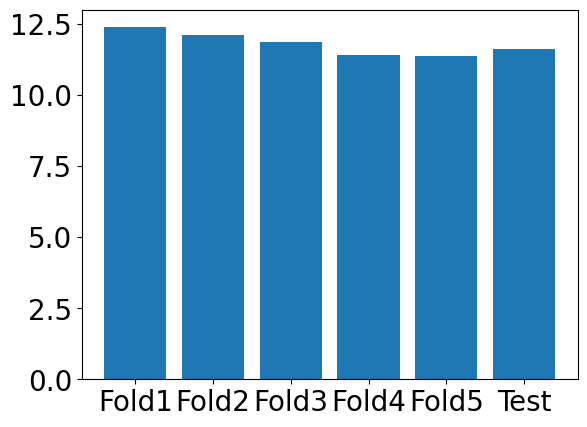

In [34]:
mae_scores = [-1 * i for i in cv_scores['test_neg_mean_absolute_error']]
mae_scores.append(svr_test_perf['mae'])

plt.xticks(range(len(labels)), labels)
# plt.ylabel('MAE')
plt.bar(range(len(rmse_scores)), mae_scores)
plt.show()

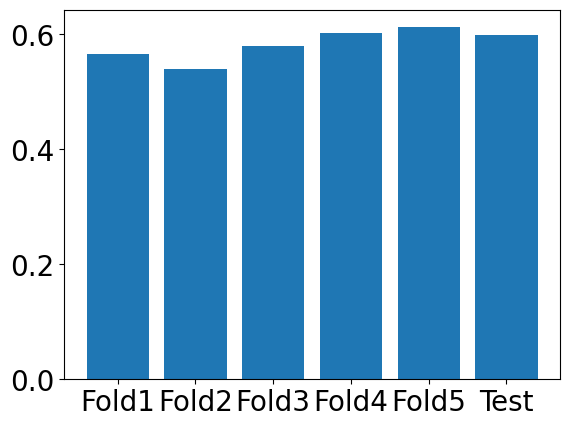

In [35]:

r2_scores = [i for i in cv_scores['test_r2']]
r2_scores.append(svr_test_perf['r2'])

plt.xticks(range(len(labels)), labels)
# plt.ylabel('R2')
plt.bar(range(len(rmse_scores)), r2_scores)
plt.show()

### 5.2.6 Model score with training data and testing data

In [36]:
print("Support Vector Regression Training score: {}".format(svr_model.score(X_train, y_train)))
print("Support Vector Regression Testing score: {}".format(svr_model.score(X_test, y_test)))

Support Vector Regression Training score: 0.7197303184873475
Support Vector Regression Testing score: 0.5983345069944405


## 5.3 Random Forest

### 5.3.1 Grid search to tune model hyper-parameters

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# grid search code adapted from luisguiserrano (from A2)
rf_params = {
    'n_estimators'  : [10, 20, 50, 100],
    'max_depth'       : [10, 15, 20, 30],
    'min_samples_split'   : [20, 50, 100]
}

rf = RandomForestRegressor()
rf_gs = GridSearchCV(estimator=rf, param_grid=rf_params,
                     scoring='neg_root_mean_squared_error', cv=5)
rf_gs.fit(X_train, y_train)
rf_model = rf_gs.best_estimator_

rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.3.2 Create a Random Forest model with best hyper-parameters

In [38]:
# Final model based on grid search
best_n_est = rf_model.n_estimators
best_max_d = rf_model.max_depth
best_min_smp = rf_model.min_samples_split

rf_model = RandomForestRegressor(n_estimators = best_n_est, max_depth = best_max_d,
                                 min_samples_split = best_min_smp, random_state = 42)

### 5.3.3 Cross validation with training dataset

In [39]:
# Cross validation with training dataset
k_folds = 5
cv_scores = cross_validate(
    estimator = rf_model,
    X = X_train, 
    y = y_train, 
    cv = k_folds, 
    scoring = ('neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'),
    return_train_score = False
)

rf_train_perf = {
    "rmse": -1 * np.mean(cv_scores['test_neg_root_mean_squared_error']),
    "mae" : -1 * np.mean(cv_scores['test_neg_mean_absolute_error']),
    "r2"  : np.mean(cv_scores['test_r2'])
}
rf_train_perf

{'rmse': 15.708274306784086,
 'mae': 12.663903135392953,
 'r2': 0.5128091388753353}

### 5.3.4 Model evaluation with test dataset

In [40]:
rf_model.fit(X_train, y_train)
rf_y_predict = rf_model.predict(X_test)

rf_test_perf = {
    "rmse": mean_squared_error(y_test, rf_y_predict, squared=False),
    "mae" : mean_absolute_error(y_test, rf_y_predict),
    "r2"  : r2_score(y_test, rf_y_predict)
}
rf_test_perf

{'rmse': 15.590273085246968,
 'mae': 12.325837200630684,
 'r2': 0.5448341702794246}

### 5.3.5 Model prediction graph

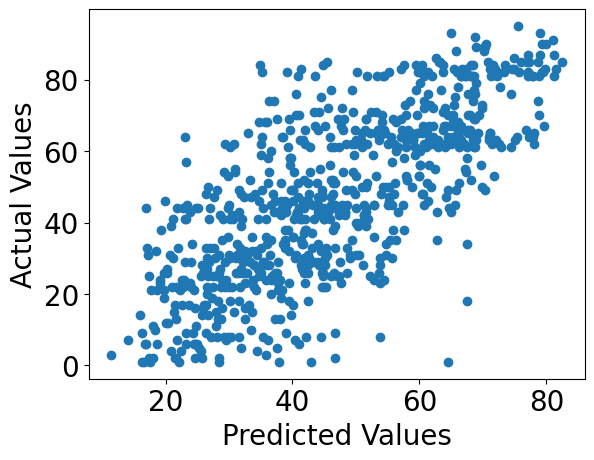

In [41]:
plt.scatter(rf_y_predict, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### 5.3.6 Model score with training data and testing data

In [42]:
print("Random Forest Regression Training score: {}".format(rf_model.score(X_train, y_train)))
print("Random Forest Regression Testing score: {}".format(rf_model.score(X_test, y_test)))

Random Forest Regression Training score: 0.8077050657955692
Random Forest Regression Testing score: 0.5448341702794246
